<a href="https://colab.research.google.com/github/custom-hyper/Analytics/blob/main/Trading_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title
!pip install statistics --quiet
!pip install yfinance --quiet
!pip install pytrends --quiet
!pip install pycoingecko --quiet
!pip install pandas --quiet
!pip install Backtesting --quiet
!pip install mplfinance --quiet

     |████████████████████████████████| 62 kB 378 kB/s 
     |████████████████████████████████| 175 kB 7.7 MB/s 
     |████████████████████████████████| 71 kB 4.2 MB/s 


In [3]:
#@title Ta-lib – Extra steps { display-mode: "code" }
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

Selecting previously unselected package libta-lib0.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 271 kB 6.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for ta-lib: filename=TA_Lib-0.4.25-cp37-cp37m-linux_x86_64.whl size=1471142 sha256=41505cbd705f35d0a8cb14f9da3c1d85d44bfd94abc044725761

In [4]:
#@title Search Token
CoinGecko_id = "matic-network" #@param {type:"string"}
yahoo_id = "MATIC-USD" #@param {type:"string"}


# Big  Picture

Text(0.5, 1.0, 'Google Trends')

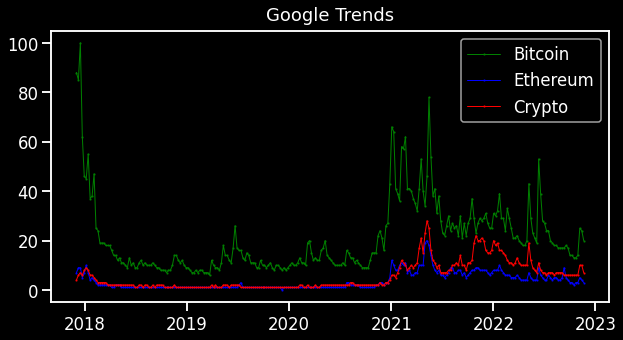

In [5]:
#@title
#@title Google Trends
import seaborn as sns
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(10, 5))
# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()


pytrend.build_payload(kw_list=['Bitcoin', 'Ethereum','Crypto'])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

plt.plot( 'Bitcoin', 'y1', data=df, marker='x', color='green',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Ethereum', 'y2', data=df, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Crypto', 'y3', data=df, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )

#plt.plot( 'Cosmos Crypto', 'y5', data=df, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )
plt.legend()


# title
plt.title('Google Trends', loc='center',pad=10)


In [6]:
#@title
#@title Crypto Fear & Greed Index

import requests

from datetime import datetime
import time
import json
from google.colab import data_table
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt



#General Information table
response = requests.get("https://api.alternative.me/fng/?limit=0")
output = response.text
json_parsed = json.loads(output)

df = pd.json_normalize(json_parsed)


df1 = pd.concat([pd.json_normalize(x) for x in df['data'].values.tolist()])
timeseries = df1['timestamp']
df1['date'] = pd.to_datetime(df1['timestamp'], unit = 's')

df_fear_greed = pd.concat([df1['date'], df1['value']], axis=1)
df3 = pd.concat([df1['date'], df1['value_classification']])

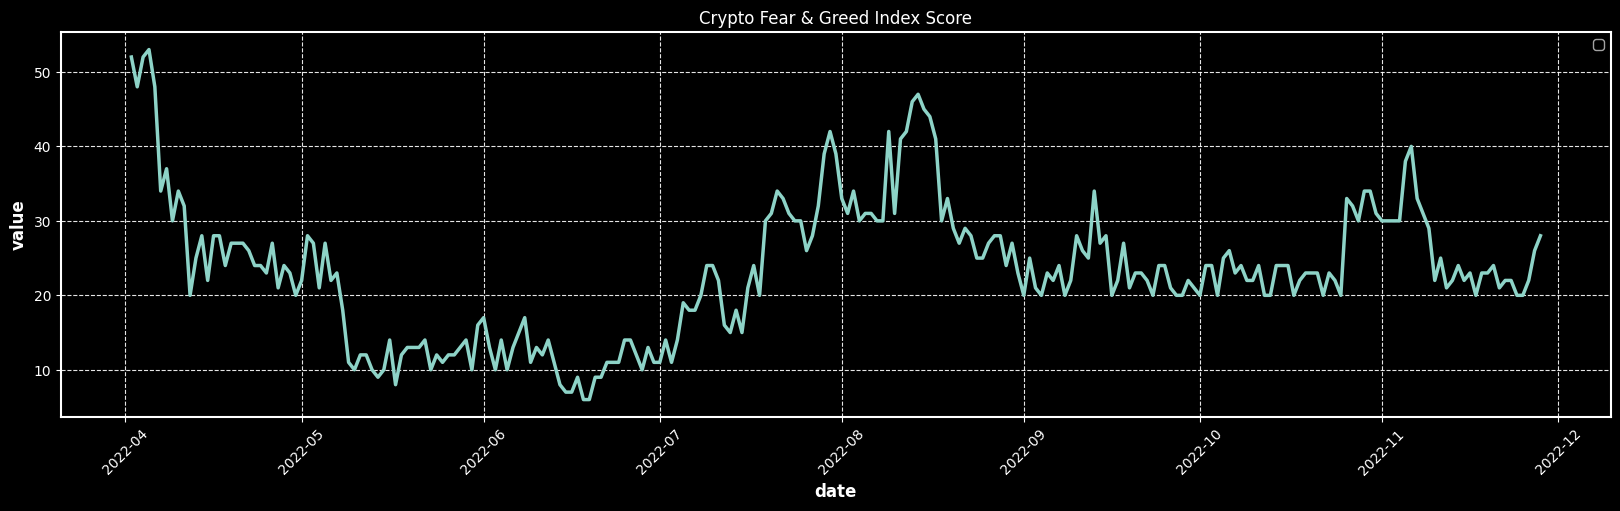

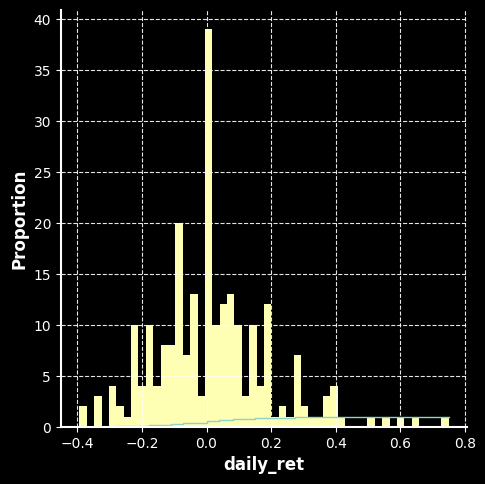

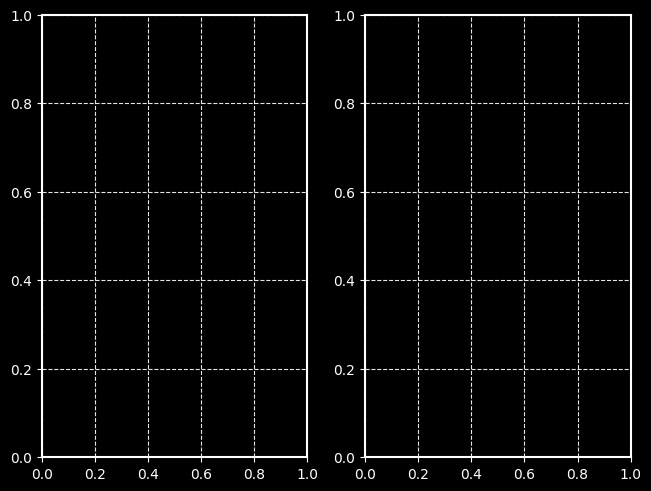

In [98]:
#@title
#@title


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.style.use("dark_background")
#sns.set_theme(style="darkgrid")

#Choose the date range
df_fear_greed = df_fear_greed[(df_fear_greed['date'] > '2022-04-01')]

df_fear_greed['value'] = df_fear_greed['value'].astype(int)
 
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_fear_greed, linewidth=2.5, x="date", y="value", sort=False)
#sns.lineplot(df_fear_greed=df, linewidth=2.5, x="date", y="TotalCapMrktCurUSD")
plt.title('Crypto Fear & Greed Index Score')

plt.xticks(rotation=45)

plt.legend()


df_fear_greed.head(1)


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

df_fear_greed['daily_ret'] = df_fear_greed['value'].pct_change(1)
ECDF = sns.displot(df_fear_greed, x="daily_ret", kind="ecdf")
Histogram = df_fear_greed['daily_ret'].hist(bins = 50)

ECDF, Histogram = plt.subplots(ncols=2, nrows=1, constrained_layout=True)

plt.show()

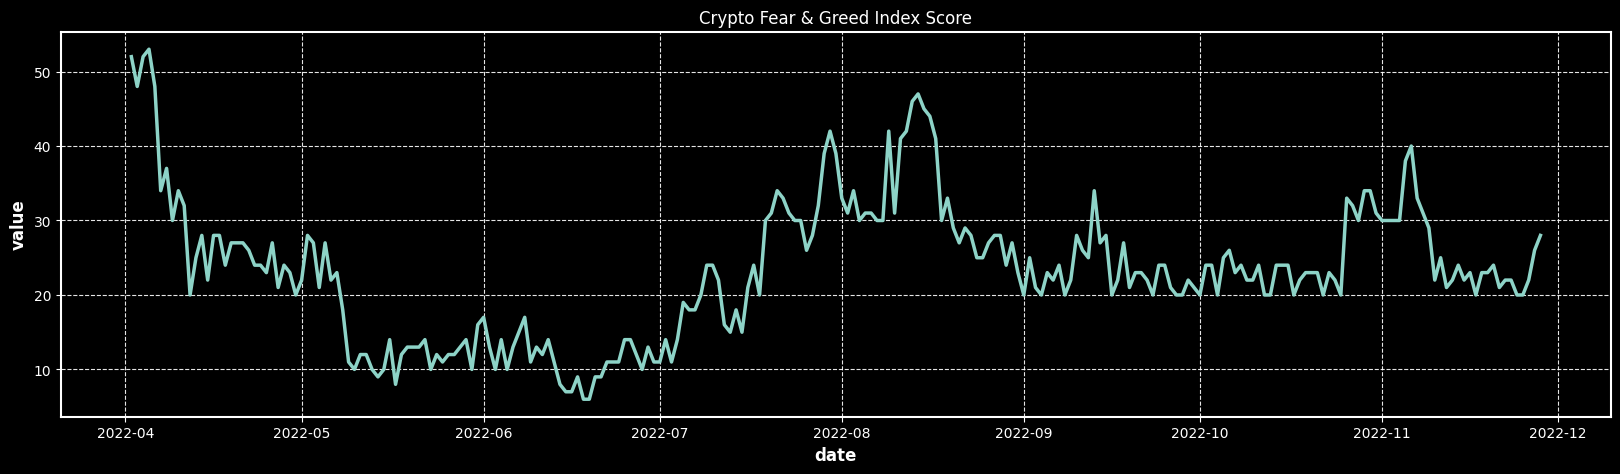

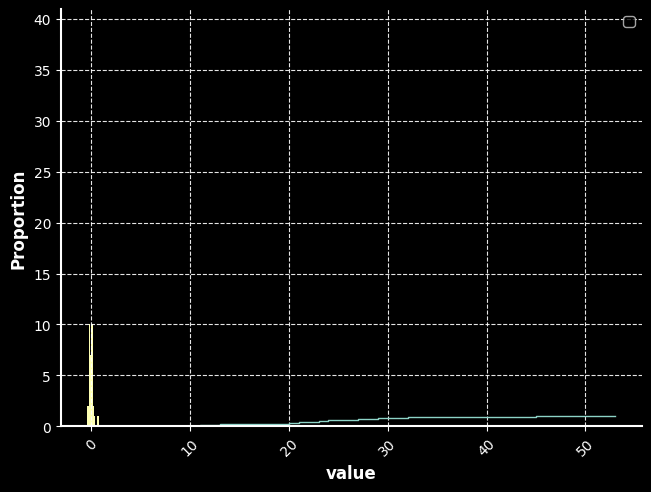

In [78]:
#@title
#@title


import numpy as np
import pandas as pdSleepplt.figure(figsize=(20, 5))

sns.lineplot(data=df_fear_greed, linewidth=2.5, x="date", y="value", sort=False)
#sns.lineplot(df_fear_greed=df, linewidth=2.5, x="date", y="TotalCapMrktCurUSD")
plt.title('Crypto Fear & Greed Index Score')



df_fear_greed.head(1)
sns.displot(df_fear_greed, x="value", kind="ecdf")


df_fear_greed['daily_ret'] = df_fear_greed['value'].pct_change(1)
df_fear_greed['daily_ret'].hist(bins = 50,figsize = (7,5))

plt.xticks(rotation=45)
plt.legend()
plt.show()

# Technical Analysis

In [29]:
#@title S&P 500
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
import talib as ta

ticker='SPY'


ticker_y = yf.Ticker(ticker)
Name = ticker_y.info['longName']
ticker_y.info

data = yf.download(tickers=ticker, period='200d')


[*********************100%***********************]  1 of 1 completed


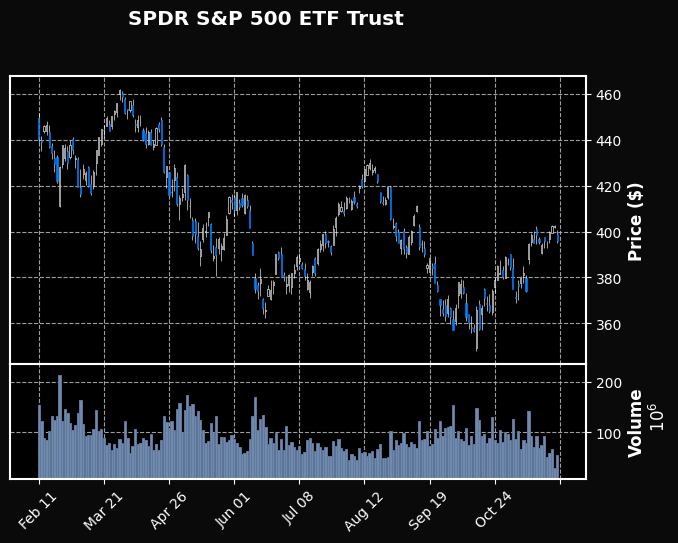

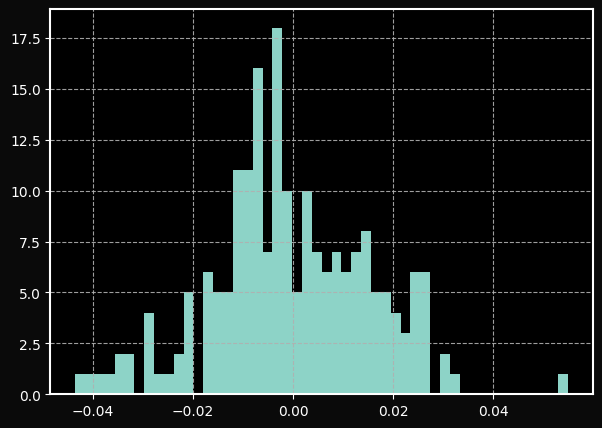

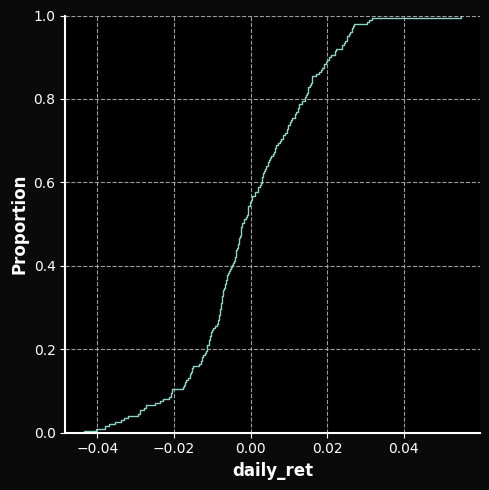

In [79]:
#@title
import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=Name,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            )

data['daily_ret'] = data['Close'].pct_change(1)
data['daily_ret'].hist(bins = 50,figsize = (7,5))
sns.displot(data, x="daily_ret", kind="ecdf")


[*********************100%***********************]  1 of 1 completed



Related News – ^VIX

– Stock Market News for Nov 23, 2022
– Stock Market News for Nov 21, 2022
– Short Holiday Week Could Result in Upside for Stocks
– Three seasonal effects in the stock market begin around Thanksgiving, and this year it’s time to buy this asset class
– Stock Market News for Nov 15, 2022
– Stock Market News for Nov 14, 2022
– Stock Market News for Nov 11, 2022


/usr/local/lib/python3.7/dist-packages/mplfinance/plotting.py:678: UserWarning:

Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.



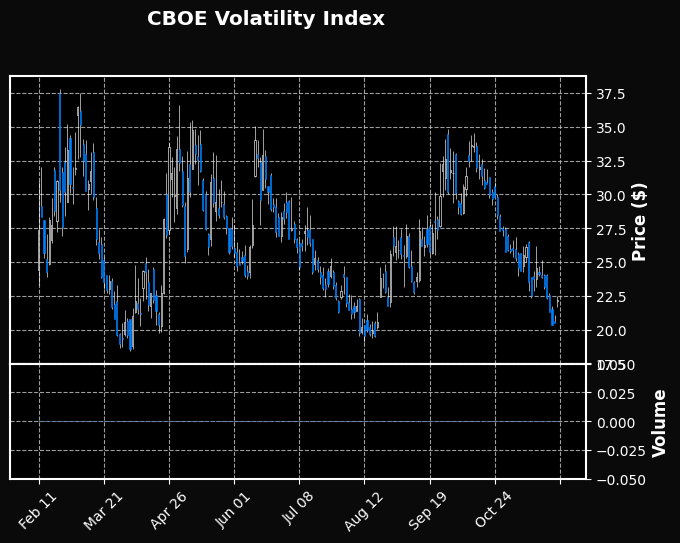

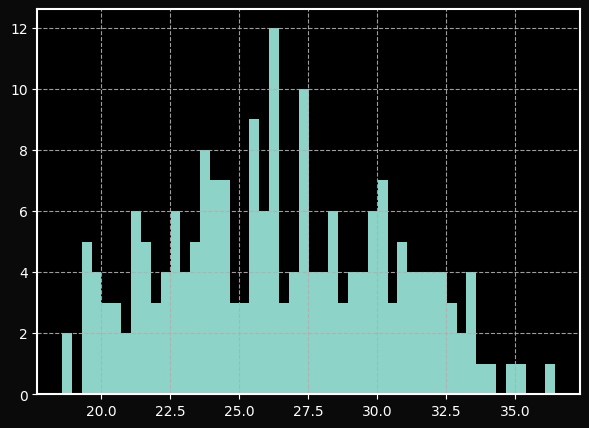

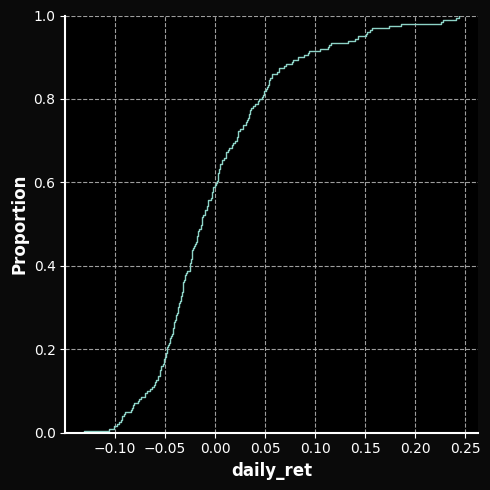

In [81]:
#@title  VIX
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='^VIX'


ticker_y = yf.Ticker(ticker)
Name = ticker_y.info['shortName']
ticker_y.info

data = yf.download(tickers=ticker, period='200d')

fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(
    title=Name,
    yaxis_title='Price',
   
)

fig.show()
ticker_y.info

print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass

import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=Name,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            )

data['daily_ret'] = data['Close'].pct_change(1)
data['Close'].hist(bins = 50,figsize = (7,5))
sns.displot(data, x="daily_ret", kind="ecdf")


[*********************100%***********************]  1 of 1 completed



Related News – QQQ

– Jobless Claims, Goods Orders, Airline Metrics Up Ahead of Holiday
– Stocks surge at open, Nasdaq solidly in the green
– Nasdaq rips higher, S&P 500 gains as tech lifts stocks
– ETF investors are ‘trying to get back to core set of exposures’ amid surging inflows, expert says
– How Every Leveraged ETF Can Cost Investors Money
– Nasdaq leads market declines, British pound loses value against U.S. dollar
– Economic Data Gradually Dwindles: Jobless Claims, Productivity & More


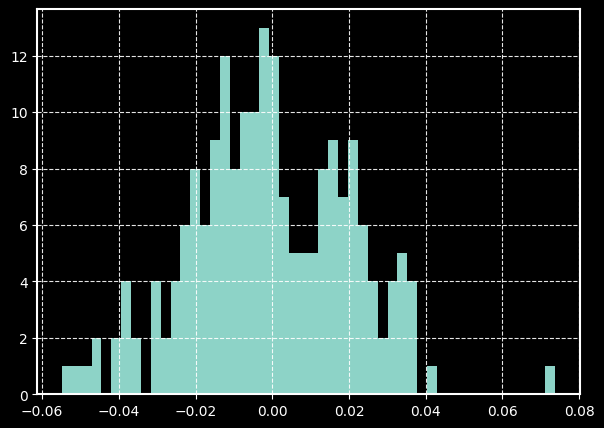

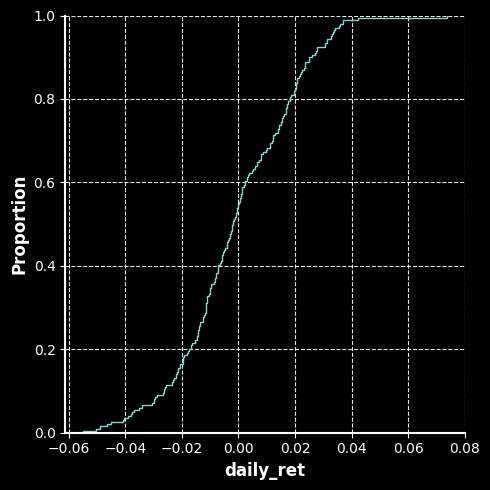

In [28]:
#@title NASDAQ
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

plt.style.use("dark_background")

ticker='QQQ'


ticker_y = yf.Ticker(ticker)
Name = ticker_y.info['longName']
ticker_y.info

data = yf.download(tickers=ticker, period='200d')

fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(
    title=Name,
    yaxis_title='Price',
   
)

fig.show()
ticker_y.info

print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass

data['daily_ret'] = data['Close'].pct_change(1)
data['daily_ret'].hist(bins = 50,figsize = (7,5))
sns.displot(data, x="daily_ret", kind="ecdf")

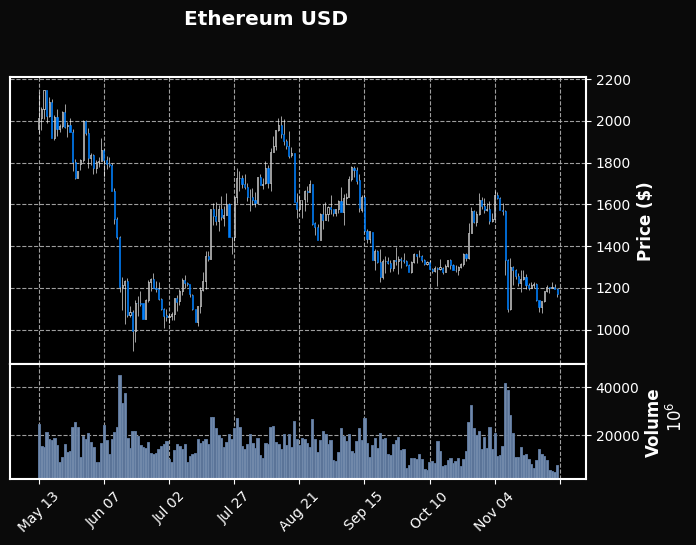

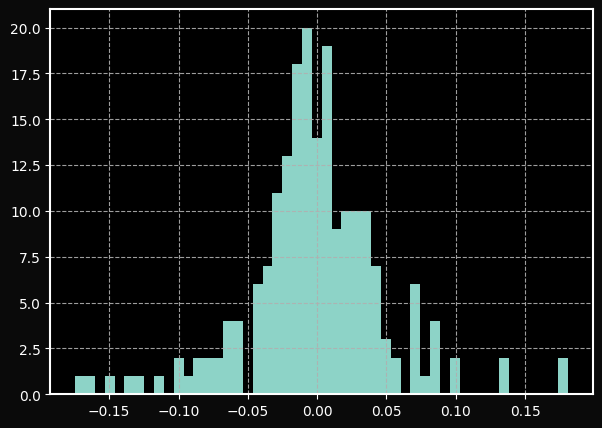

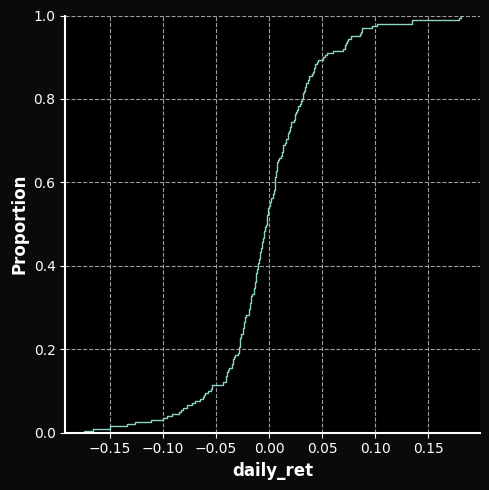

In [27]:
#@title

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=Name,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            )


data['daily_ret'] = data['Close'].pct_change(1)
data['daily_ret'].hist(bins = 50,figsize = (7,5))
sns.displot(data, x="daily_ret", kind="ecdf")

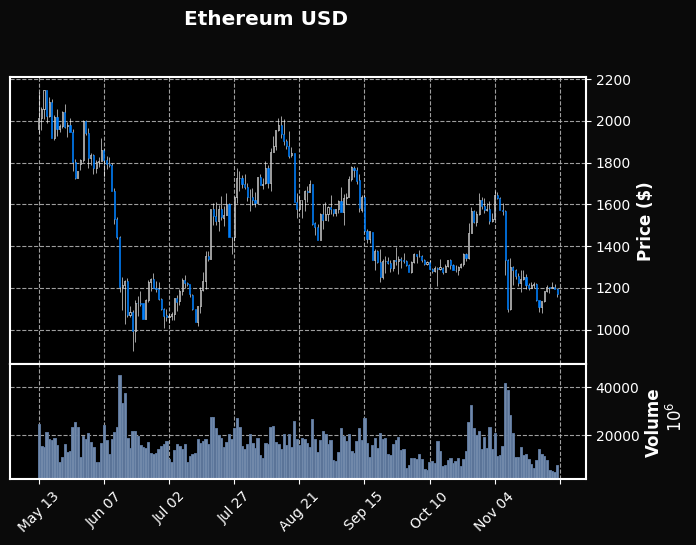

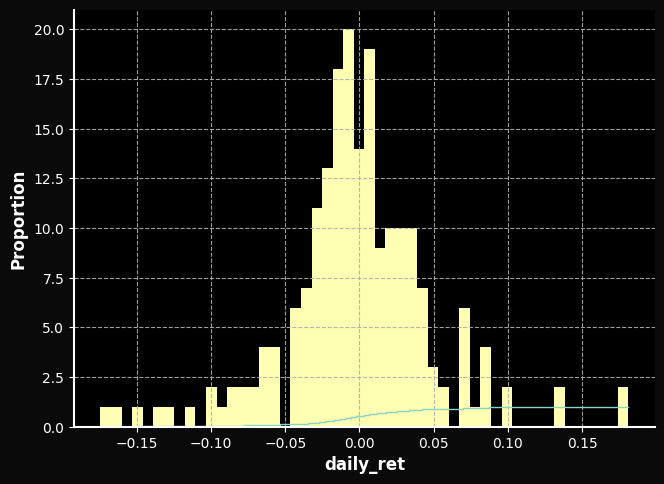

In [ ]:
#@title

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=Name,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            )


data['daily_ret'] = data['Close'].pct_change(1)

sns.displot(data, x="daily_ret", kind="ecdf")

data['daily_ret'].hist(bins = 50,figsize = (7,5))

[*********************100%***********************]  1 of 1 completed



Related News – BTC-USD



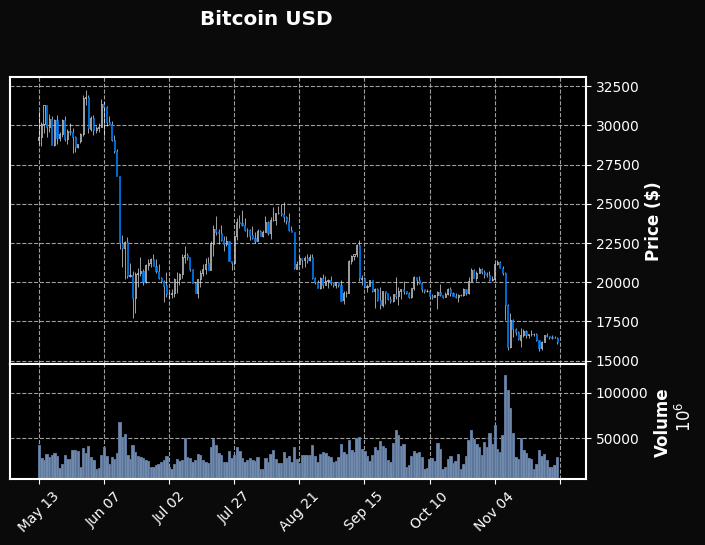

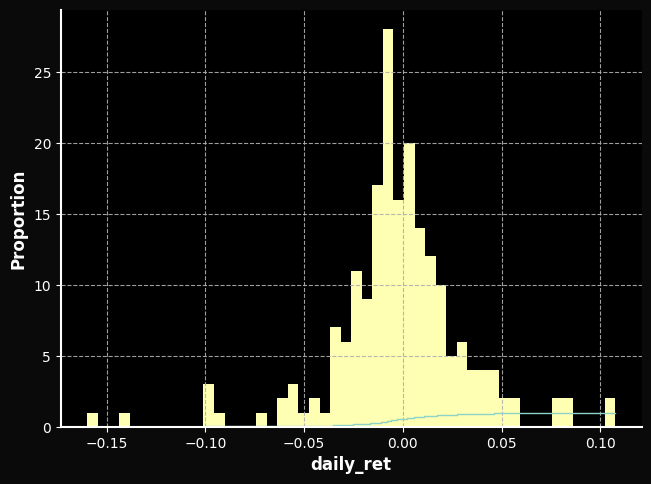

In [82]:
#@title Bitcoin
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='BTC-USD'


ticker_y = yf.Ticker(ticker)
Name = ticker_y.info['shortName']
ticker_y.info

data = yf.download(tickers=ticker, period='200d')

fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(
    title=Name,
    yaxis_title='Price',
   
)

fig.show()
ticker_y.info

print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass
  
fplt.plot(
            data,
            type='candle',
            style='mike',
            title=Name,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            )
data['daily_ret'] = data['Close'].pct_change(1)

sns.displot(data, x="daily_ret", kind="ecdf")

data['daily_ret'].hist(bins = 50,figsize = (7,5))

[*********************100%***********************]  1 of 1 completed



Related News – ETH-USD

– Cyber Monday is almost over—don't miss these incredible deals on Samsung soundbars and more
– Shop Cyber Monday 2022 deals while you still can: 80+ of the best deals on laptops, TVs and more
– 110+ Cyber Monday toy deals you don't want to miss: Nintendo, Melissa & Doug and more
– Tesla project ‘Highland’ to bring changes to Model 3, Chevrolet unveils EV sports sedan
– The Salvation Army Urges Americans to Learn More About the Impact of Giving Tuesday Donations
– 130+ best Cyber Monday sales: Save on everything from devices to shoes while you can
– Thai Beverage Public Company Limited Just Beat EPS By 6.8%: Here's What Analysts Think Will Happen Next


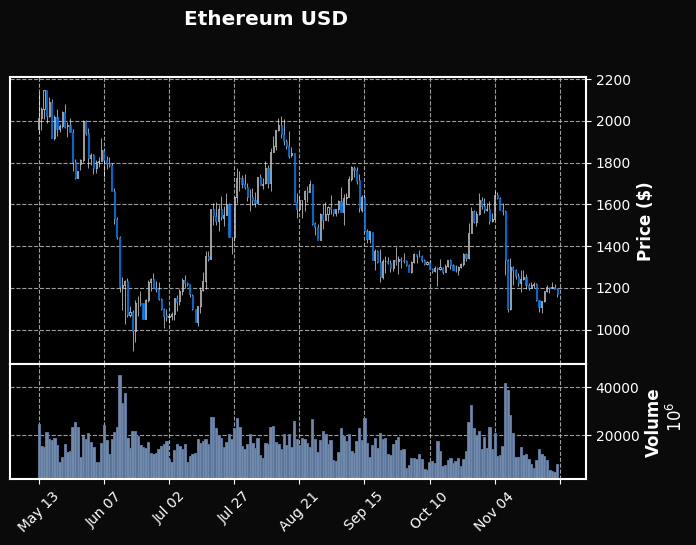

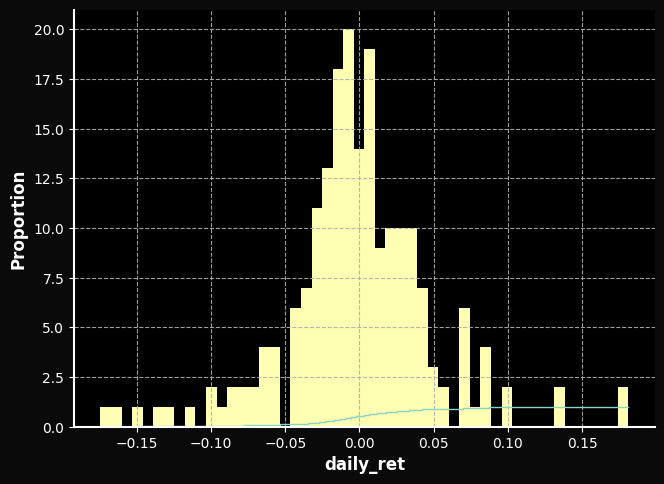

In [83]:
#@title Ethereum
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='ETH-USD'


ticker_y = yf.Ticker(ticker)
Name = ticker_y.info['shortName']
ticker_y.info

data = yf.download(tickers=ticker, period='200d')

fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

fig.update_layout(
    title=Name,
    yaxis_title='Price',
   
)

fig.show()
ticker_y.info

print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass

  
fplt.plot(
            data,
            type='candle',
            style='mike',
            title =Name,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            )

data['daily_ret'] = data['Close'].pct_change(1)

sns.displot(data, x="daily_ret", kind="ecdf")

data['daily_ret'].hist(bins = 50,figsize = (7,5))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DXY: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


<Figure size 640x480 with 0 Axes>

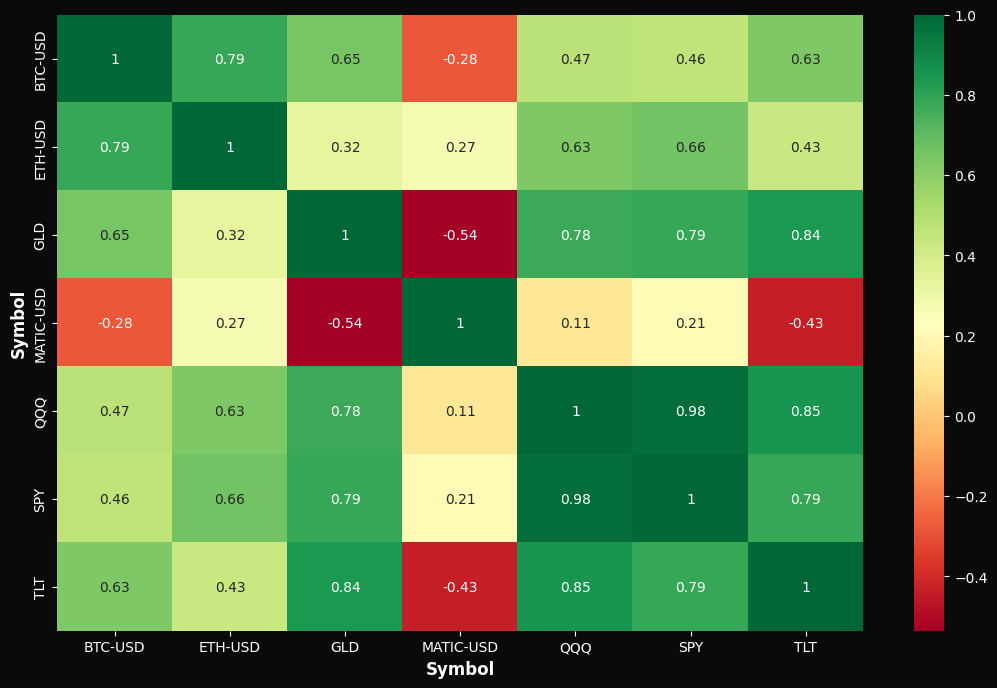

<Figure size 640x480 with 0 Axes>

In [15]:
#@title Correlation

import numpy as np 
import pandas as pd 
# Used to grab the stock prices, with yahoo 
import pandas_datareader as web 
from datetime import datetime 
# To visualize the results 
import matplotlib.pyplot as plt 
import seaborn

start = datetime(2022,9, 1)
symbols_list = [yahoo_id,'SPY', 'QQQ', 'ETH-USD', 'BTC-USD', 'TLT', 'DXY', 'GLD']
#array to store prices
symbols=[]

#array to store prices
symbols=[]
for ticker in symbols_list:     
    
    r = yf.download(tickers=ticker, period='200d')
    # add a symbol column   
    r['Symbol'] = ticker    
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()
df_pivot=df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()
corr_df = df_pivot.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)
plt.figure(figsize=(13, 8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

# Intraday Fundamentals

Connect to screener database

Trade Management

In [114]:
#@title

import requests
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


cg = CoinGeckoAPI()

  
response = requests.get("https://api.coingecko.com/api/v3/coins/{}".format(CoinGecko_id))
output = response.text
json_parsed = json.loads(output)
  

links = 'Complete list: '+str(json_parsed['links'])
chat_url = 'Chat: '+str(json_parsed['links']['chat_url'])
Twitters = 'Twitter: '+str('https://twitter.com/')+str(json_parsed['links']['twitter_screen_name'])
homepage = 'Homepage: '+str(json_parsed['links']['homepage'])
subreddit_url =  'Reddit: ' +str(json_parsed['links']['subreddit_url'])
pd.set_option('display.width', 10)

print('')
print('WEB Links')
print('')
print(homepage)
print(Twitters)
print(subreddit_url)
print(chat_url)


print(links)

print('')  
print('MARKET DATA')  
print('')  


market_cap = json_parsed['market_data']['market_cap']['usd']
circulating_supply = json_parsed['market_data']['circulating_supply']
# circulating_supply.astype(int) 
current_price = json_parsed['market_data']['current_price']['usd']
# current_price.astype(int) 
fdv_to_tvl_rati = json_parsed['market_data']['fdv_to_tvl_ratio']
# fdv_to_tvl_ratio.astype(int) 
fully_diluted_valuation = json_parsed['market_data']['fully_diluted_valuation']['usd']
# fully_diluted_valuation
max_supply = json_parsed['market_data']['max_supply']
mcap_to_tvl_ratio = json_parsed['market_data']['mcap_to_tvl_ratio']
total_supply = json_parsed['market_data']['total_supply']
total_value_locked = json_parsed['market_data']['total_value_locked']['usd']
total_volume = json_parsed['market_data']['total_volume']['usd']

float_rotation_24h = total_volume / market_cap
circulating_cap = current_price * json_parsed['market_data']['circulating_supply']
total_cap = current_price * total_supply
max_cap = current_price * max_supply 
supply_expansion_multiple = max_supply  / circulating_supply


print('')  
try:
  
  circulating_versus_max = circulating_supply/total_supply
  market_cap_dilution_ratio =  fully_diluted_valuation / market_cap
  
  dict_custom = {}
  dict_custom['float_rotation_24h'] = float_rotation_24h
  dict_custom['supply_expansion_multiple'] = supply_expansion_multiple
  dict_custom['circulating_versus_max'] = circulating_versus_max
  dict_custom['market_cap_dilution_ratio'] = market_cap_dilution_ratio - 1
except ZeroDivisionError:
  print('null')
  
print(dict_custom )

print('          ') 


df_market = {}
df_market['market_cap'] = market_cap
#Final been up what is on the national emergency, informative or what basket is something the P is the spaciousness up to Sarah  ankedat1['circulating_supply'] = circulating_supply
df_market['current_price'] = current_price
# df_market['fdv_to_tvl_ratio'] = fdv_to_tvl_ratio#
df_market['fully_diluted_valuation'] = fully_diluted_valuation
# ankedat1['max_supply'] = max_supply
df_market['mcap_to_tvl_ratio'] = mcap_to_tvl_ratio
df_market['total_supply'] = total_supply
df_market['total_value_locked'] = total_value_locked
df_market['mcap_to_tvl_ratio'] = mcap_to_tvl_ratio
df_market['total_volume'] = total_volume


df_market




print('          ')  
print('PRICE ACTION')  
price_change_percentage_7d = json_parsed['market_data']['price_change_percentage_7d']
price_change_percentage_14d = json_parsed['market_data']['price_change_percentage_14d']
price_change_percentage_30d = json_parsed['market_data']['price_change_percentage_30d']
price_change_percentage_60d = json_parsed['market_data']['price_change_percentage_60d']
price_change_percentage_200d = json_parsed['market_data']['price_change_percentage_200d']
price_change_percentage_1y = json_parsed['market_data']['price_change_percentage_1y']



dict_return = {}
dict_return['price_change_percentage_7d'] = price_change_percentage_7d
dict_return['price_change_percentage_14d'] = price_change_percentage_14d
dict_return['price_change_percentage_30d'] = price_change_percentage_30d
dict_return['price_change_percentage_60d'] = price_change_percentage_60d
dict_return['price_change_percentage_200d'] = price_change_percentage_200d
dict_return['price_change_percentage_1y'] = price_change_percentage_1y

print(dict_return)



category = json_parsed['categories']

print('')  
print('CATEGORIES')  
print(category)
  



description  = [] 
pd.set_option('display.width', 10)
pd.set_option("display.max_rows", None, "display.max_columns", None)
description = json_parsed['description']['en']

print('')  
print('DESCRIPTION: ')
print(description)


links = json_parsed['links']



#





WEB Links

Homepage: ['https://polygon.technology/', 'https://blog.polygon.technology/', '']
Twitter: https://twitter.com/0xPolygon
Reddit: https://www.reddit.com/r/maticnetwork/
Chat: ['', 'https://discord.com/invite/XvpHAxZ', 'https://t.me/PolygonAnnouncements']
Complete list: {'homepage': ['https://polygon.technology/', 'https://blog.polygon.technology/', ''], 'blockchain_site': ['https://etherscan.io/token/0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0', 'https://ethplorer.io/address/0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0', 'https://polygonscan.com/token/0x0000000000000000000000000000000000001010', 'https://bscscan.com/token/0xCC42724C6683B7E57334c4E856f4c9965ED682bD', 'https://moonriver.moonscan.io/token/0x682f81e57eaa716504090c3ecba8595fb54561d8', 'https://moonbeam.moonscan.io/token/0x3405A1bd46B85c5C029483FbECf2F3E611026e45', 'https://explorer.energi.network/token/0x98997e1651919faeacee7b96afbb3dfd96cb6036', '', '', ''], 'official_forum_url': ['', '', ''], 'chat_url': ['', 'htt

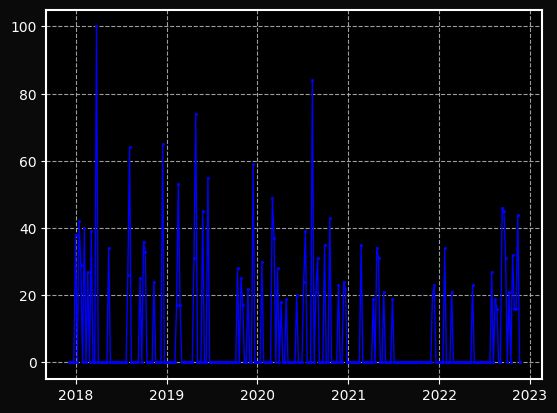

In [17]:
#@title

 
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


cg = CoinGeckoAPI()

a = cg.get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days = 'max')

df = pd.DataFrame(data=a, columns = ['Date','Open','High', 'Low', 'Close'])

fig2 = go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])
                      
fig2.show()

# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

#print(interest_over_time_df.tail(10))
# multiple line plot
# multiple line plot
plt.plot( keyword, 'y1', data=df, marker='x', color='blue',linestyle='-', linewidth=1,ms=1.5 )

# Twitter